In [1]:
import os; os.chdir("../")
import sys; sys.path.append('scripts')

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Set default figure size (width, height) in inches
plt.rcParams['figure.figsize'] = [12, 4]  # Example: 8 inches wide, 6 inches tall

# Set default font size for all text in plots
plt.rcParams['font.size'] = 14  # Example: 12-point font


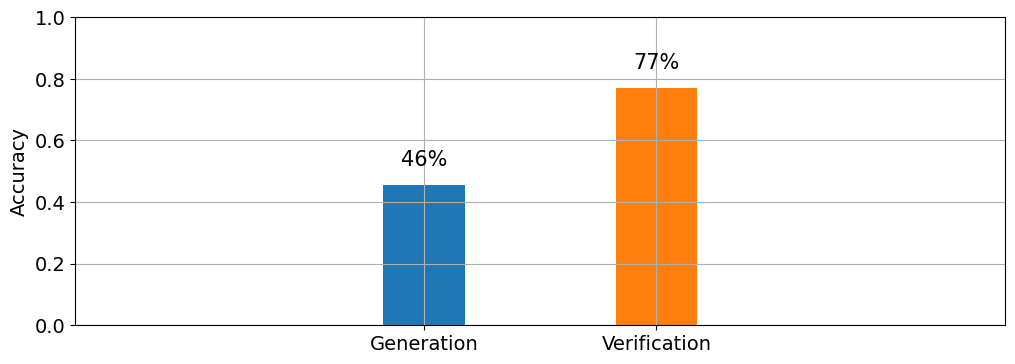

In [53]:
plt.figure(figsize=(12, 4))
# plt.title("Accuracy of Generation and Verification")

# Reduce the width of the bars
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(0.1, 0.9)

val = [0.4564, 0.7691]
narrowed_x_positions = [0.4, 0.6]
plt.bar(narrowed_x_positions, val, color=['C0', 'C1'], width=0.07)

# Adjust x-ticks to match the new positions
plt.xticks(narrowed_x_positions, ["Generation", "Verification"], fontsize=14)

# Add text to the bars
plt.text(narrowed_x_positions[0], val[0]+0.05, f"{val[0]*100:.0f}%", ha='center', va='bottom', fontsize=15)
plt.text(narrowed_x_positions[1], val[1]+0.05, f"{val[1]*100:.0f}%", ha='center', va='bottom', fontsize=15)

plt.grid()
plt.show()



In [5]:
import pickle
import numpy as np

with open("train_res.pkl", "rb") as f:
    train_res = pickle.load(f)
liks = np.array([item['likelihood'] for item in train_res])

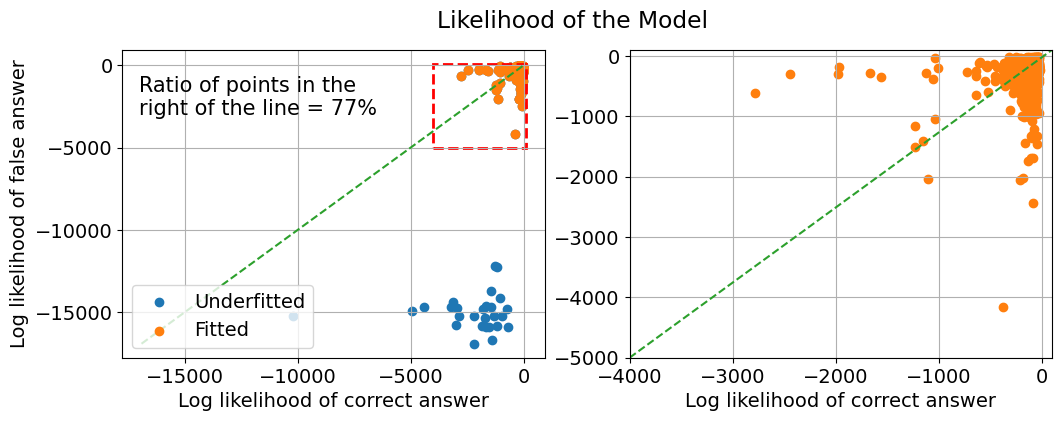

In [55]:
from matplotlib.patches import Rectangle

# Separate the points into x and y coordinates
x_coords, y_coords = zip(*liks)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Likelihood of the Model')

# Create the scatter plot
x_lim = (-4000, 100)
y_lim = (-5000, 100)

# Replace the value that is out of the limits with the np.nan
axes[0].scatter(x_coords, y_coords, color='C0', label="Underfitted")

_x_coords = np.where((np.array(x_coords) < x_lim[0]) | (np.array(x_coords) > x_lim[1]), np.nan, x_coords)
_y_coords = np.where((np.array(y_coords) < y_lim[0]) | (np.array(y_coords) > y_lim[1]), np.nan, y_coords)

axes[0].scatter(_x_coords, _y_coords, color='C1', label="Fitted")

total_min = min(min(x_coords), min(y_coords))
axes[0].plot(np.linspace(total_min, 10), np.linspace(total_min, 10), color='C2', linestyle='--')

rect = Rectangle((-4000, -5000), 4100, 5100, linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
axes[0].add_patch(rect)
axes[0].text(-17000, -3000, "Ratio of points in the \nright of the line = 77%", color='black', fontsize=15)
axes[0].legend(loc="lower left")


# Add labels and legend
axes[0].set_xlabel('Log likelihood of correct answer')
axes[0].set_ylabel('Log likelihood of false answer')
axes[0].grid()

# Create the scatter plot
axes[1].scatter(x_coords, y_coords, color='C1')
axes[1].plot(np.linspace(*x_lim), np.linspace(*y_lim), color='C2', linestyle='--')
axes[1].set_xlim(*x_lim)
axes[1].set_ylim(*y_lim)

# Add labels and legend
axes[1].set_xlabel('Log likelihood of correct answer')
axes[1].grid()



# Display the plot
plt.show()